In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
penguins_df = sns.load_dataset('penguins')
penguins_df.dropna(inplace=True)
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# ANALIZANDO LAS ESPECIES

In [3]:
(penguins_df
 .value_counts(['island','sex','species'])
 .reset_index(name='count')
 )

,island,sex,species,count
0,Biscoe,Male,Gentoo,61
1,Biscoe,Female,Gentoo,58
2,Dream,Female,Chinstrap,34
3,Dream,Male,Chinstrap,34
4,Dream,Male,Adelie,28
5,Dream,Female,Adelie,27
6,Torgersen,Female,Adelie,24
7,Torgersen,Male,Adelie,23
8,Biscoe,Female,Adelie,22
9,Biscoe,Male,Adelie,22


In [4]:
penguins_df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [5]:
penguins_df = (
    penguins_df.assign(is_adelie=lambda df: df.species.replace(['Adelie', 'Chinstrap', 'Gentoo'],[1,0,0]))
)
penguins_df

<ipython-input-5-85340cf83caf>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  penguins_df.assign(is_adelie=lambda df: df.species.replace(['Adelie', 'Chinstrap', 'Gentoo'],[1,0,0]))


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,is_adelie
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1
...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,0


# REGRESIÓN LOGISTICA

In [7]:
model_is_adelie = smf.logit(
    formula='is_adelie ~ flipper_length_mm + C(sex)',
    data=penguins_df
).fit()
model_is_adelie.summary()

Optimization terminated successfully.
         Current function value: 0.355225
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              is_adelie   No. Observations:                  333
Model:                          Logit   Df Residuals:                      330
Method:                           MLE   Df Model:                            2
Date:                Thu, 06 Feb 2025   Pseudo R-squ.:                  0.4818
Time:                        03:38:35   Log-Likelihood:                -118.29
converged:                       True   LL-Null:                       -228.29
Covariance Type:            nonrobust   LLR p-value:                 1.693e-48
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            40.5684      4.669      8.689      0.000      31.418      49.719
C(sex)[T.Male]        1.2827      0.356      3.601      0.000       0.585       1.981
flipper_length_mm    -0.2097      0.024     -8.635      0.000      -0.257      -0.162
=====================================================================================
"""

In [9]:
is_adelie_predictions = pd.DataFrame(
    dict(
        actual_value = penguins_df.is_adelie,
        predicted_value = model_is_adelie.predict().round()
    )
)
is_adelie_predictions

,actual_value,predicted_value
0,1,1.0
1,1,1.0
2,1,0.0
4,1,1.0
5,1,1.0
...,...,...
338,0,0.0
340,0,0.0
341,0,0.0
342,0,0.0


In [11]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(is_adelie_predictions.actual_value,is_adelie_predictions.predicted_value)
conf_matrix

array([[151,  36],
       [ 17, 129]])

<ipython-input-12-3bd0813523c1>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


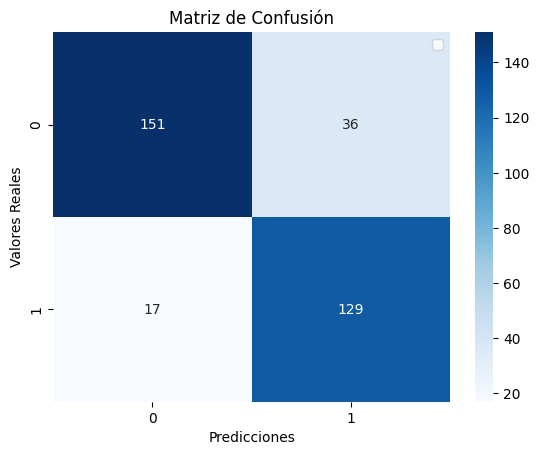

In [12]:
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(is_adelie_predictions['actual_value'],is_adelie_predictions['predicted_value'])
print(f'Accuracy : {accuracy:.4f}')

Accuracy : 0.8408
